# **Project Name** : **Uber Supply-Demand Gap Analysis**



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name**            - Sanjana Kumari

# **Project Summary**

This project analyzes Uber ride request data to uncover patterns in demand, supply, and operational inefficiencies. The objective is to identify root causes of trip failures and highlight demand-supply gaps across various time slots, weekdays, and pickup locations. The dataset was initially cleaned in Excel, foundational KPIs were explored using SQL, and deeper insights are now derived through EDA in Python. Key findings show that ride failures are highest during evening hours and at the Airport, pointing to potential improvements in driver allocation and scheduling.

# **GitHub Link**

https://github.com/Sanjana-97/uber-supply-demand-gap-analysis

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: For better visuals
sns.set(style="whitegrid")
%matplotlib inline

### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv("Uber_cleaned.csv")

### Dataset First View

In [3]:
# Dataset First Look
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Hour of Request,Request Time Slot,Trip Duration (mins),Ride Outcome,Request Weekday
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Morning,69.00,Success,Monday
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Evening,50.00,Success,Monday
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Morning,41.00,Success,Tuesday
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Night,55.00,Success,Tuesday
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning,52.52,Success,Wednesday


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

Rows: 6745
Columns: 11


### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Request id            6745 non-null   int64  
 1   Pickup point          6745 non-null   object 
 2   Driver id             4095 non-null   float64
 3   Status                6745 non-null   object 
 4   Request timestamp     6745 non-null   object 
 5   Drop timestamp        2831 non-null   object 
 6   Hour of Request       6745 non-null   int64  
 7   Request Time Slot     6745 non-null   object 
 8   Trip Duration (mins)  2831 non-null   float64
 9   Ride Outcome          6745 non-null   object 
 10  Request Weekday       6745 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 579.8+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")

Total duplicate rows: 0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
missing_values = df.isnull().sum()
print("Missing/Null Values Count:")
print(missing_values)

Missing/Null Values Count:
Request id                 0
Pickup point               0
Driver id               2650
Status                     0
Request timestamp          0
Drop timestamp          3914
Hour of Request            0
Request Time Slot          0
Trip Duration (mins)    3914
Ride Outcome               0
Request Weekday            0
dtype: int64


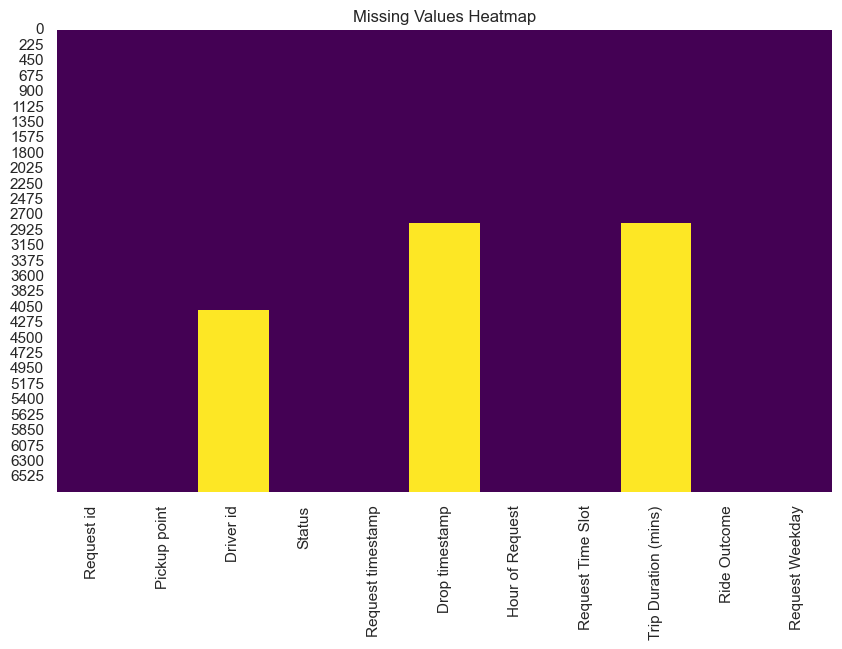

In [8]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

### What did you know about your dataset?

### Dataset Overview

- **Total Records:** 6,745
- **Total Columns:** 11
- **Duplicate Records:** 0
- **Missing Values:**
  - `Driver id`: 2,650 missing values (likely due to unassigned drivers in failed trips)
  - `Drop timestamp`: 3,914 missing values (indicates failed or unfulfilled rides)
  - `Trip Duration (mins)`: 3,914 missing values (corresponds with missing drop timestamps)

These missing values suggest that over 50% of the requests were not completed and thus lacked driver assignment and drop details.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp', 'Hour of Request',
       'Request Time Slot', 'Trip Duration (mins)', 'Ride Outcome',
       'Request Weekday'],
      dtype='object')

In [10]:
# Dataset Describe
df[['Hour of Request', 'Trip Duration (mins)']].describe()

,Hour of Request,Trip Duration (mins)
count,6745.000000,2831.000000
mean,12.956709,52.413783
std,6.504052,13.850660
min,0.000000,20.780000
25%,7.000000,41.000000
50%,13.000000,52.080000
75%,19.000000,64.000000
max,23.000000,83.000000


### Variables Description

- **Request id**: Unique identifier for each ride request.
- **Pickup point**: Location of request origin, either 'City' or 'Airport'.
- **Driver id**: Unique identifier for the driver (if assigned).
- **Status**: Ride status, 'Trip Completed', 'Cancelled', or 'No Cars Available'.
- **Request timestamp**: Date and time when the ride was requested.
- **Drop timestamp**: Date and time when the trip ended (only for completed rides).
- **Hour of Request**: Extracted hour (0–23) from the request timestamp.
- **Request Time Slot**: Time slot category (e.g., Morning, Evening) based on hour.
- **Trip Duration (mins)**: Duration of the trip in minutes (for successful rides).
- **Ride Outcome**: Outcome labeled as 'Success' or 'Failed'.
- **Request Weekday**: Weekday name extracted from the request timestamp.

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
df.nunique()

Request id              6745
Pickup point               2
Driver id                300
Status                     3
Request timestamp       5618
Drop timestamp          2598
Hour of Request           24
Request Time Slot          6
Trip Duration (mins)    1325
Ride Outcome               2
Request Weekday            5
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'])
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'])
df['Driver id'] = df['Driver id'].astype('Int64')  

cat_cols = ['Pickup point', 'Status', 'Request Time Slot', 'Ride Outcome', 'Request Weekday']
df[cat_cols] = df[cat_cols].astype('category')

### What all manipulations have you done and insights you found?

### What all manipulations have you done and insights you found?

#### Data Cleaning (Excel):
- Removed duplicate records to avoid redundancy.
- Fixed timestamp formats in `Request timestamp` and `Drop timestamp` for uniformity.
- Added new columns: `Hour of Request`, `Request Time Slot`, `Trip Duration (mins)`, `Ride Outcome`, and `Request Weekday`.
- Handled blank values in `Drop timestamp` and `Driver id` by keeping them as null (NA), since they indicate failed trips.
- Resolved date-parsing issues where Excel flipped day/month values after export.

#### SQL Analysis (MySQL Workbench):
- Imported the cleaned data and verified structure and integrity.
- Calculated core KPIs: total requests, ride success vs. failure counts, pickup point distribution, hourly and weekday-wise trends.
- Identified that 42% of ride requests were successful, 58% failed.
- Found higher failures during evening hours (17:00–21:00) and at Airport pickup points.
- Discovered that Friday had the highest request volume, while Tuesday had the lowest.
- Analyzed failure rates by pickup point, time slot, and hour, highlighting major demand-supply gaps.
- Average trip duration was around 52 minutes for both City and Airport.

#### EDA in Python (Jupyter Notebook):
- Verified dataset structure and types using `info()` and `describe()`.
- Counted and visualized missing values.
- Reconfirmed that 40% of trips were incomplete (missing `Drop timestamp` and `Trip Duration`).
- Assessed data types and unique value counts for all variables.

> These manipulations laid the foundation for deeper visual and statistical analysis, targeting root causes of trip failures and supply-demand gaps.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Ride Outcome Distribution

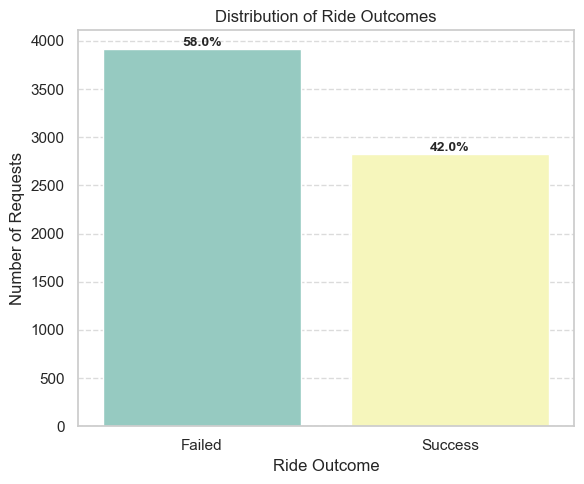

In [13]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=df, x='Ride Outcome', hue='Ride Outcome', palette='Set3', legend=False)

# Calculate total count for percentage
total = len(df)

# Add percentage labels on top of each bar
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Distribution of Ride Outcomes')
plt.xlabel('Ride Outcome')
plt.ylabel('Number of Requests')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The **countplot** was chosen because it clearly displays the frequency of each ride outcome, Success or Failed. A bar chart like this helps visualize imbalance (if any) in ride outcomes, making it easier to communicate the problem (e.g., high failure rate) to stakeholders. It’s simple, intuitive, and ideal for categorical comparison.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that ride failures significantly exceed successful rides. This indicates a major supply-demand gap, where the platform is unable to meet user demand consistently. Operational improvements are needed to reduce failures and improve service efficiency.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained will help create a positive business impact. Identifying the high failure rate allows Uber to optimize driver allocation and availability, especially during peak times. 

However, the insight also highlights a negative aspect - poor service experience due to high failure rates can lead to customer dissatisfaction and churn. Addressing this proactively can enhance user retention and platform reliability.

#### Count of Requests by Pickup Point

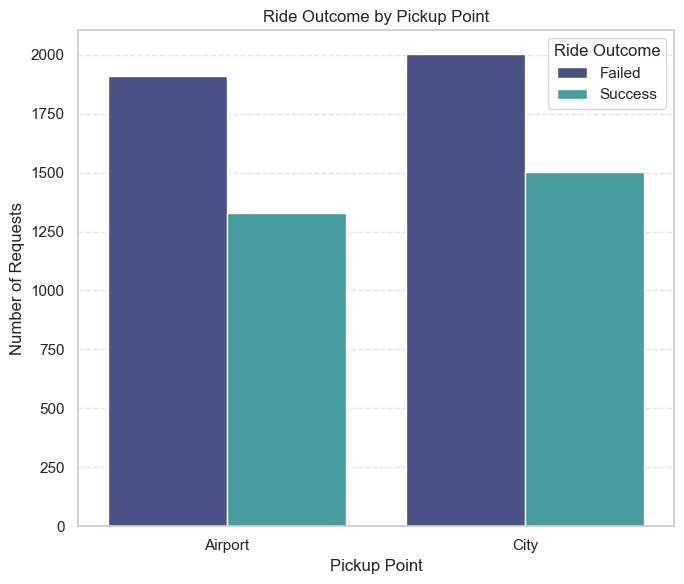

In [14]:
plt.figure(figsize=(7,6))
sns.countplot(data=df, x='Pickup point', hue='Ride Outcome', palette='mako')
plt.title('Ride Outcome by Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Number of Requests')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A grouped bar chart was chosen to effectively compare the number of successful vs. failed ride requests across the two pickup locations - City and Airport - side by side. This visual format makes it easy to identify disparities in service performance at each location.

##### 2. What is/are the insight(s) found from the chart?

- Both City and Airport have a high number of failed ride requests.
- The number of failures at the City slightly exceeds that at the Airport.
- Success rates appear almost evenly distributed but are still lower than failures at both pickup points, confirming demand-supply issues are common to both.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Recognizing that both locations contribute significantly to overall demand helps in better driver allocation planning. There are no insights here that suggest negative growth; instead, the balanced demand highlights equal focus areas for operational improvements.

#### Breakdown of Failed Ride Reasons by Pickup Point

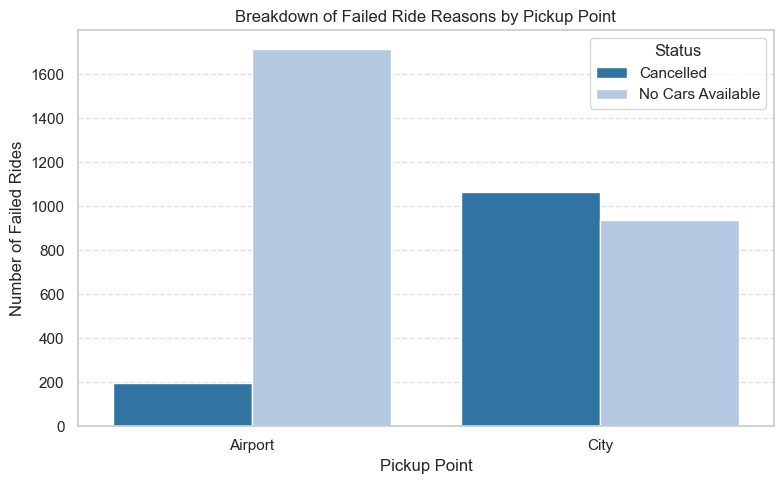

In [15]:
# Filter for failed rides only
failed_df = df[df['Status'].isin(['Cancelled', 'No Cars Available'])].copy()

# Remove unused category from 'Status' column (if it's categorical)
failed_df['Status'] = failed_df['Status'].astype('category').cat.remove_unused_categories()

# Group by Pickup Point and Failure Reason
summary = failed_df.groupby(['Pickup point', 'Status'], observed=True)['Request id'].count().reset_index()

# Plot the chart
plt.figure(figsize=(8, 5))
sns.barplot(data=summary, x='Pickup point', y='Request id', hue='Status', palette='tab20')
plt.title('Breakdown of Failed Ride Reasons by Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Number of Failed Rides')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A grouped bar chart was chosen to effectively compare the count of each failure reason (Cancelled, No Cars Available) across both pickup points (City and Airport). It allows for a clear side-by-side visual comparison of categorical variables across segments.

##### 2. What is/are the insight(s) found from the chart?

- At the Airport, the most common reason for ride failure is “No Cars Available”, indicating a major supply issue at this location.
- In the City, failures are more evenly split between “Cancelled” and “No Cars Available”, suggesting operational inefficiencies as well as supply challenges.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. These insights can guide location-specific interventions:
- Airport: Focus on improving car availability, possibly by reallocating fleet or providing driver incentives during high-demand hours.
- City: Address cancellation behavior through better driver training, stricter policies, or optimized ride-matching algorithms.

This tailored approach can help reduce failures and improve customer experience.

#### Ride Request Trend by Hour chart

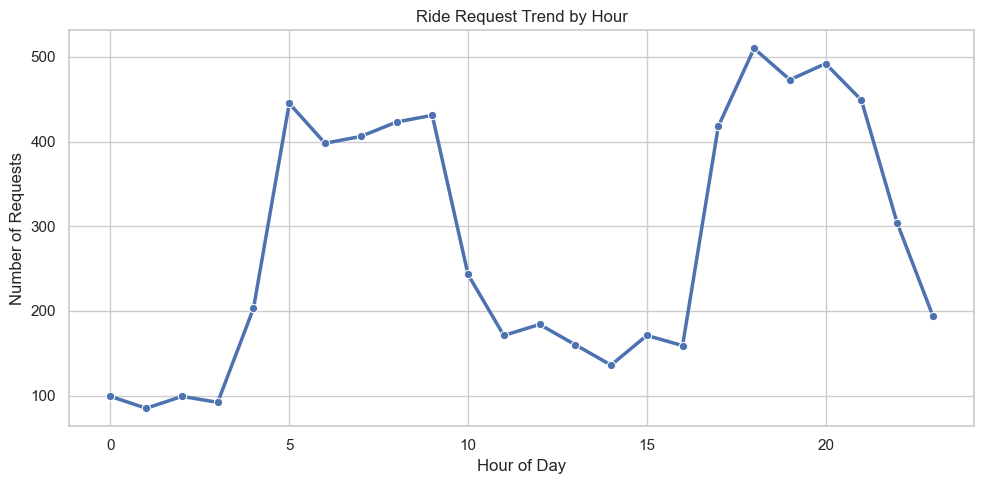

In [16]:
# Count number of ride requests per hour
hourly_requests = df['Hour of Request'].value_counts().sort_index().reset_index()
hourly_requests.columns = ['Hour of Request', 'Request Count']

# Plot
plt.figure(figsize=(10,5))
sns.lineplot(data=hourly_requests, x='Hour of Request', y='Request Count', marker='o', linewidth=2.5)
plt.title('Ride Request Trend by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Requests')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Why did you pick the specific chart?

A line plot was chosen to visualize the trend of ride requests over the 24-hour day because it effectively shows how demand fluctuates hour by hour. It helps in identifying peak and off-peak periods clearly.

####  What is/are the insight(s) found from the chart?

The chart shows that ride requests significantly increase during early morning hours (5 AM to 9 AM) and again from evening to night (5 PM to 9 PM), with a clear dip during late night and mid-day. These patterns suggest strong commuting and travel-related demand during these windows.

#### Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights are valuable for demand forecasting and optimizing driver availability during peak hours. By aligning driver shifts with these high-demand windows, Uber can reduce failed requests, improve customer satisfaction, and boost overall operational efficiency. Failure to address peak hour shortages could result in negative customer experiences and revenue loss.

#### Ride Outcome by Hour of Request

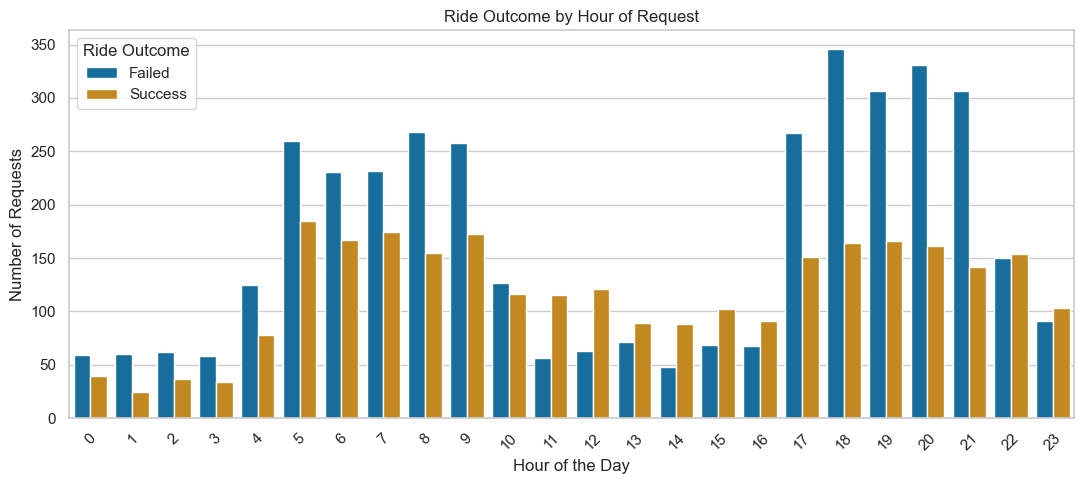

In [17]:
plt.figure(figsize=(11,5))
sns.countplot(data=df, x='Hour of Request', hue='Ride Outcome', palette='colorblind')
plt.title('Ride Outcome by Hour of Request')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This grouped bar chart allows us to compare successful and failed rides across each hour of the day, making it easy to spot when service performance drops.

##### 2. What is/are the insight(s) found from the chart?

From 5 PM to 9 PM (especially 6–8 PM), failures clearly outnumber successful rides, highlighting severe evening supply shortages. In contrast, morning to early afternoon shows relatively higher success rates.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight enables Uber to optimize driver availability and fleet scheduling in the evening. Addressing the evening shortfall can directly improve ride fulfillment, customer satisfaction, and revenue. Ignoring this may result in continued rider churn and missed business opportunities.

#### Failed Ride Reasons by Time Slot

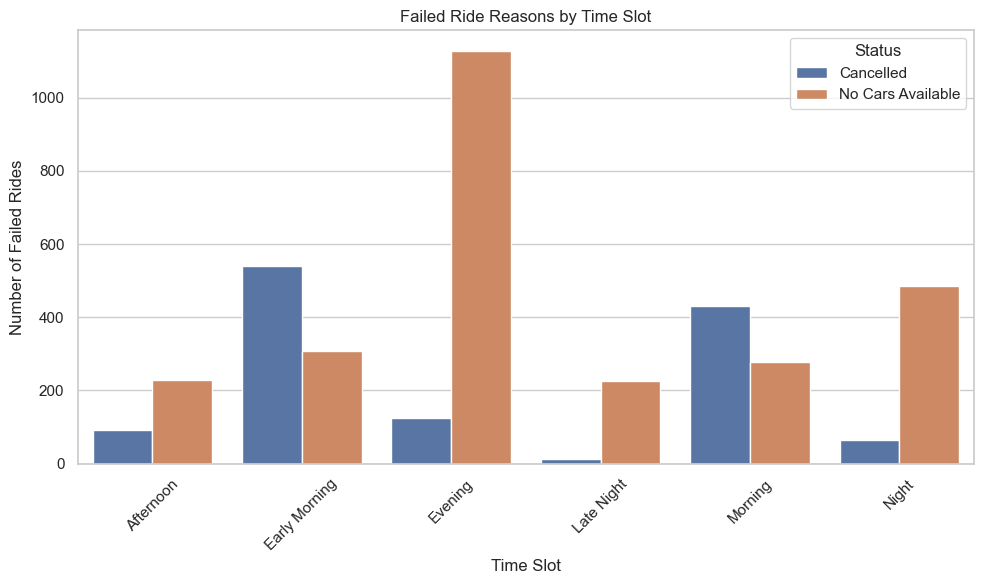

In [23]:
# Filter for failed rides only
failed_rides = df[df['Ride Outcome'] == 'Failed']

# Group and count failed ride reasons by time slot (explicitly set observed=False to silence warning)
plot_data = failed_rides.groupby(['Request Time Slot', 'Status'], observed=False)['Request id'].count().reset_index()
plot_data.rename(columns={'Request id': 'Count'}, inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_data, x='Request Time Slot', y='Count', hue='Status')
plt.title('Failed Ride Reasons by Time Slot')
plt.ylabel('Number of Failed Rides')
plt.xlabel('Time Slot')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Why was this specific chart chosen?

This grouped bar chart was chosen because it clearly shows how different failure reasons vary across time slots. It helps identify not only when failures happen the most but also why they happen — whether due to “No Cars Available” or “Cancelled”, making it easier to compare categories side by side.

#### What insights were found from the chart?
- Evening time slots show the highest number of failures, especially due to “No Cars Available”, which suggests a shortage in supply during peak hours.
- Early morning and late-night slots have fewer failures overall.
- “Cancelled” rides are more evenly spread but peak slightly in morning and evening slots.
- Midday has relatively fewer failures, indicating better balance of supply and demand.


#### Will the insights help create a positive business impact?

Yes. By identifying when and why failures occur, Uber can:
- Proactively deploy more drivers during peak failure time slots (like evenings).
- Reduce cancellations by analyzing driver-side reasons and optimizing assignment logic.
- Improve customer satisfaction by ensuring ride availability during high-demand hours, thus reducing loss of revenue and customer churn.

No major negative insights were found, but continued inaction on failure patterns could lead to dissatisfaction and market share loss.

#### Ride Outcome by Weekday

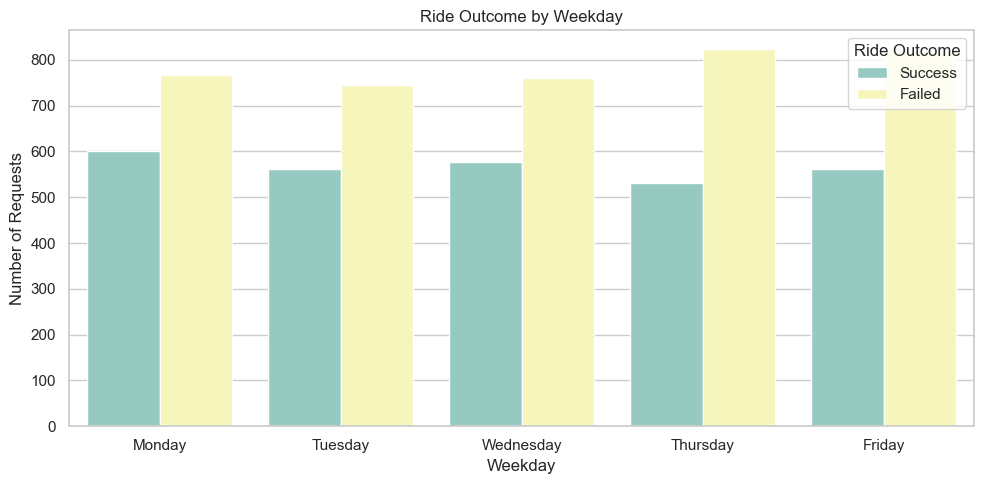

In [51]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Request Weekday', hue='Ride Outcome', 
              palette='Set3', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title('Ride Outcome by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Requests')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This grouped count plot helps reveal weekday patterns in ride outcomes. It’s ideal to spot demand fluctuations or failure surges tied to specific weekdays.

##### 2. What is/are the insight(s) found from the chart?

Thursday and Friday show the highest number of ride failures, suggesting possible weekend rush pressure. Tuesday sees relatively fewer ride requests overall.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Knowing failure spikes on Thursday and Friday can guide targeted driver allocation or demand control strategies. Without action, Uber risks losing rides and dissatisfied users during high-demand periods.

#### Ride Outcome by Time Slot

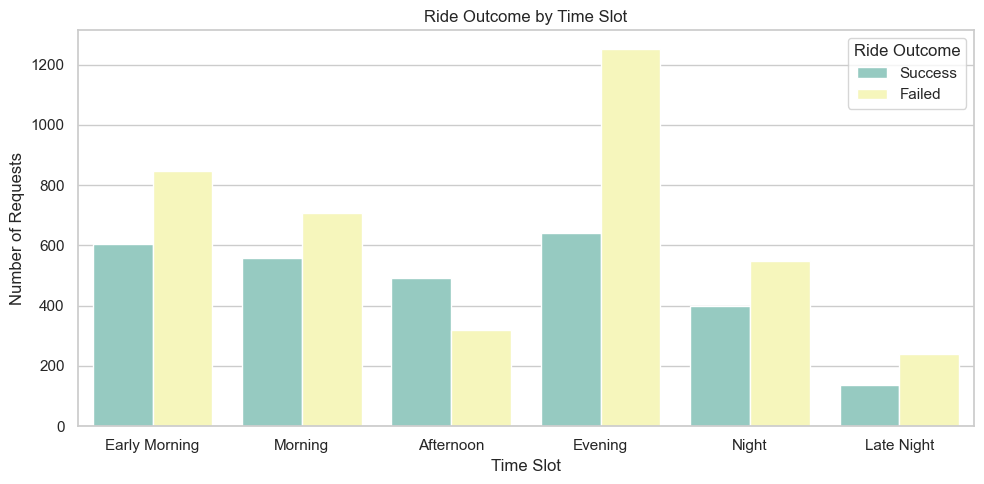

In [52]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Request Time Slot', hue='Ride Outcome', palette='Set3',
              order=['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night'])
plt.title('Ride Outcome by Time Slot')
plt.xlabel('Time Slot')
plt.ylabel('Number of Requests')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This grouped bar chart effectively compares successful and failed rides across different time slots. It highlights how ride performance fluctuates throughout the day, making it ideal for identifying peak congestion periods and unmet demand windows.

##### 2. What is/are the insight(s) found from the chart?

This grouped bar chart effectively compares successful and failed rides across different time slots. It highlights how ride performance fluctuates throughout the day, making it ideal for identifying peak congestion periods and unmet demand windows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can drive positive change. Identifying underperforming time slots allows operations teams to realign driver shifts or offer incentives for evening shifts. There is no direct indicator of negative growth, but failing to act on this insight could worsen customer dissatisfaction and reduce brand trust.

#### Ride Request Distribution by Pickup Point and Hour (Heatmap)

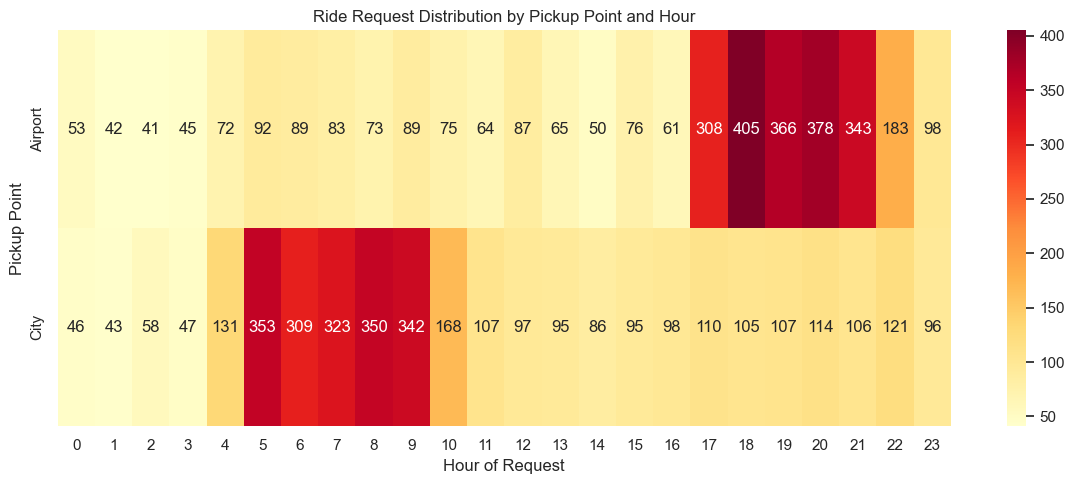

In [21]:
# Create a pivot table
heatmap_data = df.pivot_table(index='Pickup point', columns='Hour of Request', values='Request id', aggfunc='count', observed=False)

# Plot heatmap
plt.figure(figsize=(12,5))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='YlOrRd')
plt.title('Ride Request Distribution by Pickup Point and Hour')
plt.xlabel('Hour of Request')
plt.ylabel('Pickup Point')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap is effective for displaying the concentration of ride requests across pickup points and hours of the day. It allows us to visually identify peak demand periods and location-specific patterns quickly.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that ride requests from both pickup points peak between 5 PM to 9 PM, with the Airport showing slightly higher demand in those hours. Early mornings (1 AM – 4 AM) have significantly fewer ride requests.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. These insights help Uber strategically allocate driver availability during high-demand periods, especially in the evening hours. This can improve trip success rates, reduce customer wait times, and boost customer satisfaction and revenue.

# Average Trip Duration by Pickup Point

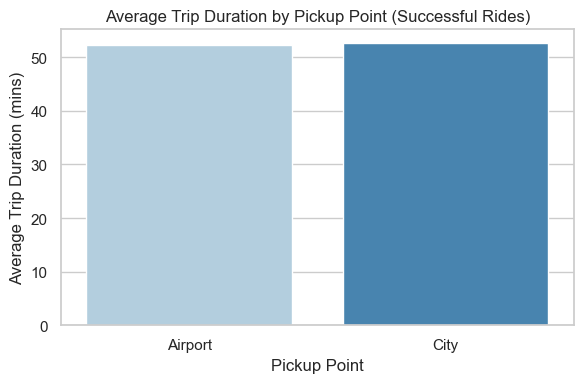

In [22]:
# Filter only successful rides
successful_df = df[df['Ride Outcome'] == 'Success']

# Calculate average trip duration by pickup point
avg_duration = successful_df.groupby('Pickup point', observed=True)['Trip Duration (mins)'].mean().round(2).reset_index()

# Plot bar chart
plt.figure(figsize=(6, 4))
sns.barplot(data=avg_duration, x='Pickup point', y='Trip Duration (mins)', hue='Pickup point', legend=False, palette='Blues')
plt.title('Average Trip Duration by Pickup Point (Successful Rides)')
plt.xlabel('Pickup Point')
plt.ylabel('Average Trip Duration (mins)')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is ideal for comparing numerical values across categories. In this case, we want to compare the average trip duration for successful rides between Airport and City pickup points. A bar chart clearly highlights differences in averages between these two locations.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that the average trip duration is almost the same for both pickup points - around 52 minutes. The slight variation is negligible, indicating that trip duration does not significantly differ based on the pickup point when a ride is completed successfully.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Knowing that average trip durations are consistent across locations can help Uber standardize expected time windows and optimize resource planning. It also confirms that trip failure issues are not due to long travel times, which helps narrow the focus to supply or scheduling gaps instead.

#### Shortest vs Longest Successful Trip Durations

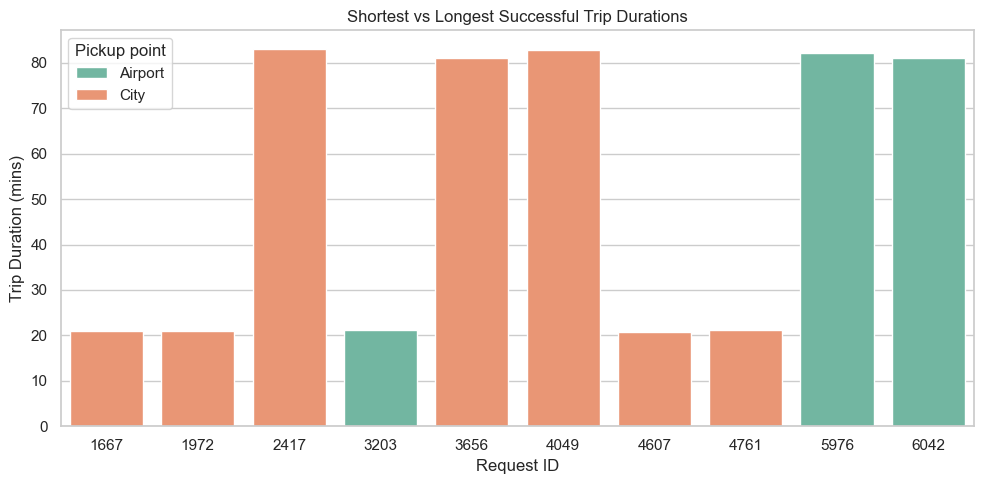

In [23]:
# Filter successful rides
successful_rides = df[df['Ride Outcome'] == 'Success']

# Top 5 shortest trips
shortest_trips = successful_rides[['Request id', 'Pickup point', 'Trip Duration (mins)']] \
                    .sort_values(by='Trip Duration (mins)') \
                    .head(5)

# Top 5 longest trips
longest_trips = successful_rides[['Request id', 'Pickup point', 'Trip Duration (mins)']] \
                    .sort_values(by='Trip Duration (mins)', ascending=False) \
                    .head(5)

# Combine both
combined = pd.concat([shortest_trips, longest_trips])

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=combined, x='Request id', y='Trip Duration (mins)', hue='Pickup point', palette='Set2')
plt.title('Shortest vs Longest Successful Trip Durations')
plt.xlabel('Request ID')
plt.ylabel('Trip Duration (mins)')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is ideal to compare specific values (trip durations) for a small number of individual records. Here, we are visualizing the 5 shortest and 5 longest successful trips, so it helps quickly understand extreme cases in terms of trip duration.

##### 2. What is/are the insight(s) found from the chart?

- The shortest successful trips are around 20–21 minutes, while the longest go up to 83 minutes.
- These trips occur from both City and Airport, indicating variability is not exclusive to a specific pickup point.
- Such long trip durations might point to data inconsistencies, route inefficiencies, or outliers worth further investigation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.
- Positive Impact: Identifying and removing outlier trips (especially those with excessive durations) helps in refining data quality and analyzing typical ride behavior more accurately.
- Negative Indicator: Extremely long trips, if valid, may highlight traffic issues, inefficient routing, or driver mismanagement, all of which can affect customer satisfaction.

#### Driver-wise Request Distribution


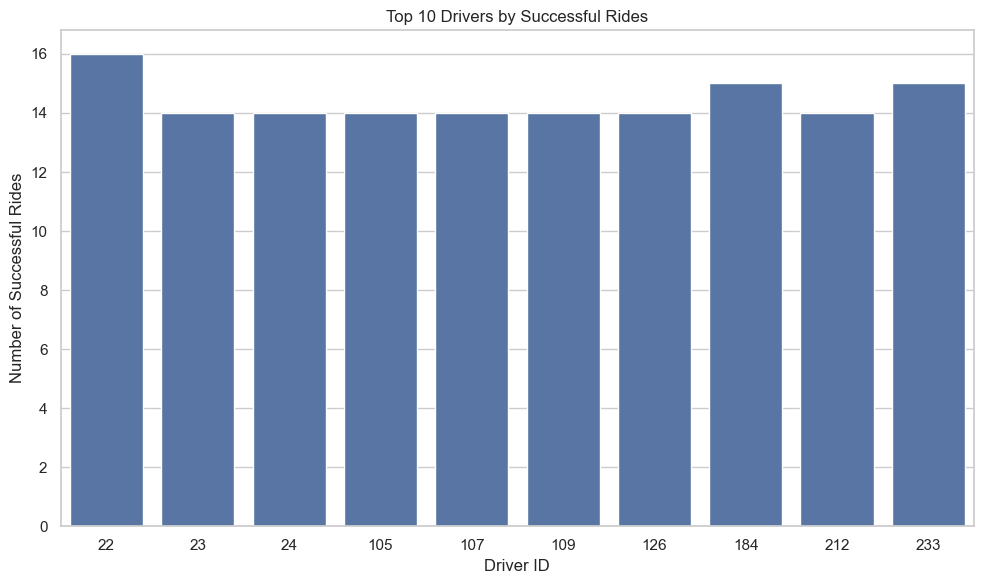

In [24]:
# Filter only successful rides
successful_df = df[df['Ride Outcome'] == 'Success']

# Top 10 drivers with highest number of successful rides
driver_success = (
    successful_df.groupby('Driver id')['Request id']
    .count()
    .reset_index()
    .rename(columns={'Request id': 'Successful Rides'})
    .sort_values(by='Successful Rides', ascending=False)
    .head(10)
)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=driver_success, x='Driver id', y='Successful Rides')  # Removed palette to avoid warning
plt.title('Top 10 Drivers by Successful Rides')
plt.xlabel('Driver ID')
plt.ylabel('Number of Successful Rides')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart was selected because it effectively highlights the top 10 drivers based on the number of successful rides. It allows for an easy comparison between individual drivers and helps identify the most active and reliable ones.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals which drivers completed the most rides successfully. These drivers likely had higher availability, better navigation or communication, or were more frequently assigned to areas with balanced demand and supply.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Recognizing high-performing drivers enables Uber to reward them, encourage best practices, and assign them to critical time slots or areas. This could reduce trip failures and improve customer satisfaction. There are no negative implications from this insight.

#### Distribution of Trip Duration for Successful Rides

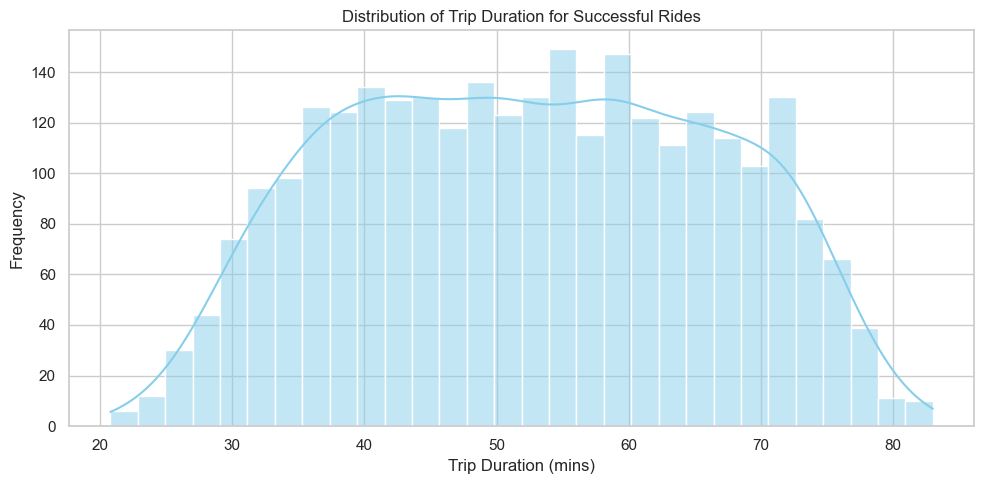

In [26]:
# Filter for successful rides only
successful_df = df[df['Ride Outcome'] == 'Success']

# Plot histogram of trip durations
plt.figure(figsize=(10, 5))
sns.histplot(successful_df['Trip Duration (mins)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Trip Duration for Successful Rides')
plt.xlabel('Trip Duration (mins)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is ideal for visualizing the distribution of a continuous numerical variable. In this case, it helps us understand how trip durations vary among successful rides and detect common trip length ranges or any outliers.

##### 2. What is/are the insight(s) found from the chart?

Most successful rides fall between 40 and 65 minutes, with a peak around 52 minutes. There are no extreme outliers, and the distribution appears moderately symmetrical, indicating consistency in average ride time.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can help optimize resource allocation and scheduling. Knowing the average trip duration helps Uber plan driver availability and reduce idle time. There’s no indication of negative growth here, as consistent trip times suggest stable operations.

#### Trip Duration vs Hour of Request

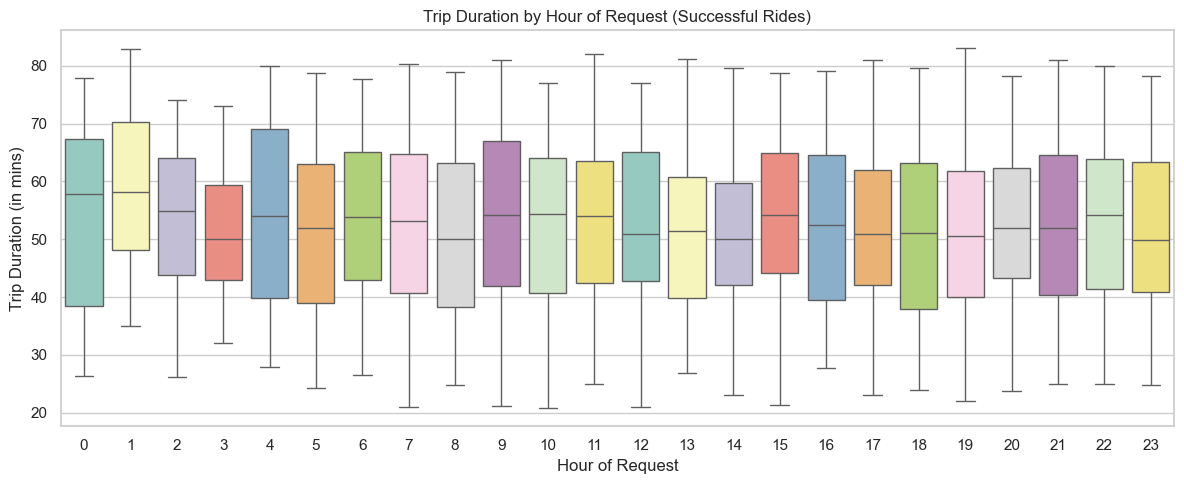

In [27]:
plt.figure(figsize=(12,5))
sns.boxplot(
    data=successful_df,
    x='Hour of Request',
    y='Trip Duration (mins)',
    hue='Hour of Request',palette='Set3',
    legend=False              
)
plt.title('Trip Duration by Hour of Request (Successful Rides)')
plt.xlabel('Hour of Request')
plt.ylabel('Trip Duration (in mins)')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A boxplot is ideal to show the distribution, central tendency (median), and spread (range and interquartile range) of trip durations across each hour of the day. It also helps spot any outliers, which is valuable for operational efficiency analysis.

##### 2. What is/are the insight(s) found from the chart?

Trip durations are generally consistent throughout the day, with slight variation between hours. The median trip time stays close to 50–55 minutes. Outliers are visible in most hours, but their presence is relatively uniform, indicating a few longer trips scattered across all time slots.

#### Trip Duration vs Hour of Request by Pickup Point

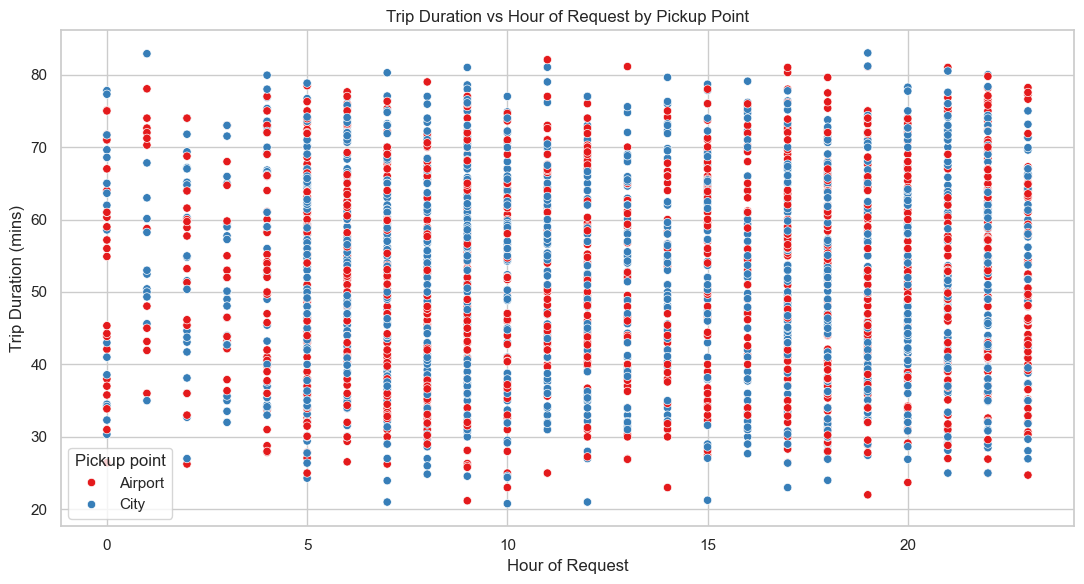

In [28]:
plt.figure(figsize=(11, 6))
sns.scatterplot(data=successful_df, x='Hour of Request', y='Trip Duration (mins)', hue='Pickup point', palette='Set1')
plt.title('Trip Duration vs Hour of Request by Pickup Point')
plt.xlabel('Hour of Request')
plt.ylabel('Trip Duration (mins)')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is suitable for visualizing the relationship between two continuous variables—in this case, Hour of Request and Trip Duration (mins). By adding Pickup Point as a hue, we can also compare how this relationship differs between the City and Airport pickup points.

##### 2. What is/are the insight(s) found from the chart?

- Most trip durations are clustered between 20 to 80 minutes across all hours.
- There’s no clear trend between trip duration and request hour, indicating trip length is not strongly time-dependent.
- Both pickup points show similar spread, but some slight outliers exist, especially for trips from the Airport.Answer Here

#### Trip Duration Distribution by Pickup Point

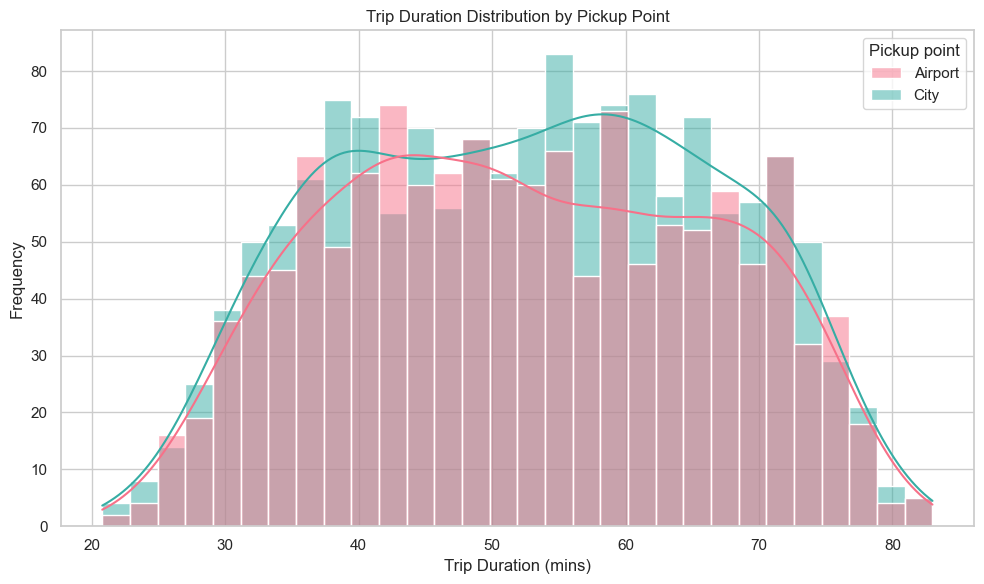

In [29]:
# Filter successful rides only
successful_df = df[df['Ride Outcome'] == 'Success']

# Plot histogram of traip durations for each pickup point
plt.figure(figsize=(10, 6))
sns.histplot(data=successful_df, x='Trip Duration (mins)', hue='Pickup point', kde=True, palette='husl', bins=30)
plt.title('Trip Duration Distribution by Pickup Point')
plt.xlabel('Trip Duration (mins)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### Why did you pick the specific chart?

A distribution plot (histogram with KDE) is ideal to visualize how trip durations are spread across different pickup points. It helps in identifying patterns such as skewness, outliers, and whether the trip durations are normally distributed or not across City and Airport.

#### What are the insights found from the chart?
- The majority of City trips are concentrated between 30–60 minutes.
- Airport trips are slightly more concentrated around 50–55 minutes with less variation.
- City trips have a longer tail, indicating more outliers or longer trips than Airport.